En este notebook se van a comparar las metricas de precisión de los modelos generados anteriormente.

## Importar librerias

In [15]:
import os
from pathlib import PurePath
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Busqueda de los ficheros de metricas

In [27]:
root = r"C:\Users\Isai\Documents\Tesis\code\data_analysis\fourier\parametros\evapotranspiration"

In [28]:
files = [(json.load(open(PurePath(root, file), "r")), int(file.split('.')[0].split('_')[1])) for file in os.listdir(root) if file.endswith(".json")]

In [29]:
files[0][0]

{'A': 1.6597466853706044,
 'omega': 0.01713267832848069,
 'phi': -1.2778403976259856,
 'offset': 4.5755328854618185,
 'mse': 0.8698965381981325,
 'r2': 0.6120512961339877}

In [30]:
raw_data = {
    'parcela': [],
    'mse': [],
    'rsquared': []
}

for i in files:
    raw_data['parcela'].append(i[1])
    raw_data['mse'].append(i[0]['mse'])
    raw_data['rsquared'].append(i[0]['r2'])

df = pd.DataFrame(raw_data)

In [31]:
df.describe()

,parcela,mse,rsquared
count,15.000000,15.000000,15.000000
mean,8.266667,0.823307,0.606949
std,4.832430,0.110857,0.020996
min,1.000000,0.725758,0.556072
25%,4.500000,0.725758,0.610135
50%,8.000000,0.853711,0.612051
75%,12.000000,0.869897,0.618208
max,16.000000,1.041145,0.618208


## Visualización de los datos modelados y los reales

In [6]:
modelados = r"C:\Users\Isai\Documents\Tesis\code\data_analysis\all_vars\zafra2022"
reales = r"C:\Users\Isai\Documents\Tesis\code\datos\parcelas\ready_to_analyze\zafra2022"

In [7]:
modelados_files = [(pd.read_csv(PurePath(modelados, file), parse_dates=True),int(file.split('.')[0].split('_')[1])) for file in os.listdir(modelados) if file.endswith(".csv")]
reales_files = [(pd.read_csv(PurePath(reales, file), parse_dates=True),int(file.split('.')[0].split('_')[1])) for file in os.listdir(reales) if file.endswith(".csv")]

In [ ]:
var = 'ndvi'
for i in modelados_files:
    for j in reales_files:
        if i[1] == j[1]:
            print(i[1])
            fig, ax = plt.subplots(figsize=(15, 5))
            plt.plot(pd.to_datetime(i[0]['Fecha']), i[0][var], label='Modelado')
            plt.plot(pd.to_datetime(j[0]['Fecha']), j[0][f'{var}_mean'], label='Real')
            ax.set_xlabel('Fecha')
            ax.set_ylabel(f'{var.upper()}')
            plt.title(f"Parcela {i[1]}")
            plt.legend()
            plt.tight_layout()
            des_path = PurePath(rf"C:\Users\Isai\Documents\Tesis\code\revision\img\{var}")
            if not os.path.exists(des_path):
                os.makedirs(des_path)
            plt.savefig(PurePath(des_path, f"parcela_{i[1]}.png"))
            plt.show()

In [ ]:
var_2 = 'ndvi'
folder = 'ndvi_precip_acum'
var_mod = 'precip_acum'
for i in modelados_files:
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(pd.to_datetime(i[0]['Fecha']), i[0][var_2], label=f'{var_2}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel(f'{var_2.upper()}')
    ax2 = ax.twinx()
    ax2.plot(pd.to_datetime(i[0]['Fecha']), i[0][var_mod], label=f'{var_mod}', color='red')
    ax2.set_ylabel(f'{var_mod.upper()}')
    plt.title(f"Parcela {i[1]}")
    des_path = PurePath(rf"C:\Users\Isai\Documents\Tesis\code\revision\img\{folder}")
    if not os.path.exists(des_path):
        os.makedirs(des_path)
    #plt.savefig(PurePath(des_path, f"parcela_{i[1]}.png"))
    plt.show()

## Comparación de las metricas de los modelos de rendimientos

In [7]:
with open(r"C:\Users\Isai\Documents\Tesis\code\data_analysis\lr_metrics\lr_juntos_max.json", "r") as file:
    metrics_max = json.load(file)
    
with open(r"C:\Users\Isai\Documents\Tesis\code\data_analysis\lr_metrics\lr_juntos_mean.json", "r") as file:
    metrics_mean = json.load(file)

In [8]:
metrics_max

[{'var': 'ndvi_max', 'r2': 0.571676, 'mse': 3688.252318, 'rmse': 60.73},
 {'var': 'cire_max', 'r2': 0.62443, 'mse': 4028.6035, 'rmse': 63.47},
 {'var': 'gndvi_max', 'r2': 0.67642, 'mse': 4363.381202, 'rmse': 66.05},
 {'var': 'ndre1_max', 'r2': 0.587777, 'mse': 3792.134169, 'rmse': 61.58}]

In [12]:
df_max = pd.DataFrame(metrics_max)
df_mean = pd.DataFrame(metrics_mean)

In [36]:
df_dif = pd.DataFrame()

In [57]:
df_dif['r2'] = abs(df_max['r2'] - df_mean['r2'])/df_mean['r2'] * 100
df_dif['mse'] = abs(df_max['mse'] - df_mean['mse'])/df_mean['mse'] * 100
df_dif['rmse'] = abs(df_max['rmse'] - df_mean['rmse'])/df_mean['rmse'] * 100
df_dif['var'] = df_max['var'].apply(lambda x: x.split('_')[0])

In [58]:
df_dif.dropna()

,r2,mse,rmse,var
0,1.512095,1.512078,0.751757,ndvi
1,3.787159,3.787168,1.901082,cire
2,11.269980,11.283070,5.817767,gndvi
3,3.300386,3.300332,1.660811,ndre1


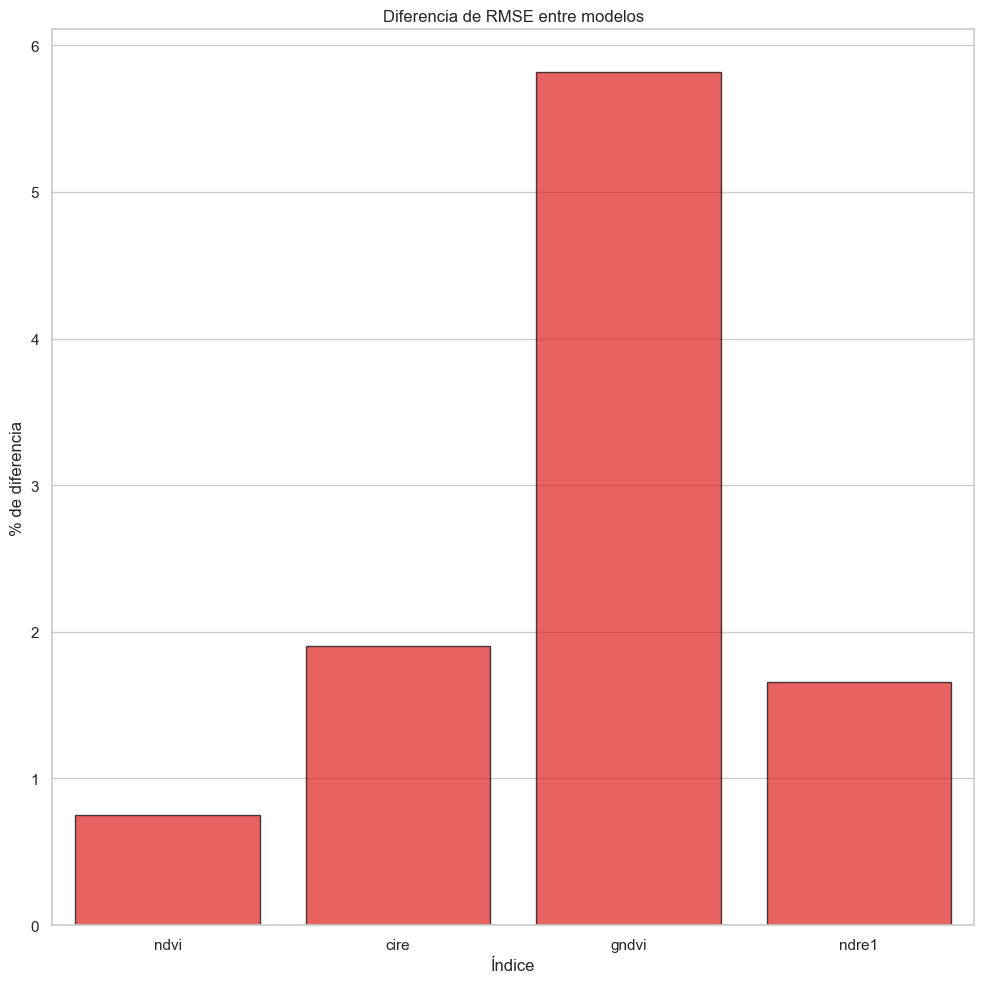

In [83]:
metric_var = 'rmse' 
plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")
sns.barplot(x='var', y=metric_var, data=df_dif, color='red', edgecolor='black', alpha=0.7)
plt.title(f'Diferencia de {metric_var.upper()} entre modelos')
plt.xlabel('Índice')
plt.ylabel('% de diferencia')
plt.tight_layout()
plt.savefig(PurePath(rf"C:\Users\Isai\Documents\Tesis\code\revision\img\juntos\metrics\{metric_var}_dif.png"), dpi=100)
plt.show()